In [1]:
include("optimization_library.jl");

# Exercise 3.3: Radiocarbon Dating Method

Radiocarbon dating is a good method to determine the age of archeological findings by determining the decay rate of the the radioactive carbon isotope $^{14}C$ in a given sample:
\begin{equation}
^{14}_6C \rightarrow ^{14}_7 N + e^- + \overline{\nu_e}
\end{equation}

The isotope $^{14}_6C$ is produced by cosmic radiation in the upper atmosphere:
<img src="figures/cosmic_rays.jpg" width="350">
Graphic from: https://www.kth.se/en/sci/centra/rymdcenter/utstallning/myondetektor-1.813976


Plants and animals live in an equilibrium with their surroundings in terms of their carbon content. The term "equilibrium" means in that context that the decaying isotopes are replaced by the exchange of $^{14}C$ through the atmosphere and their diets. Hence, the proportion of $^{14}C$ in the living being stays constant during its life. The **natural $^{14}C$ decay rate** in a sample of one gram of pure carbon from a **living animal** yields about $\mathbf{N_0 = 14}$ radioactive decays per minute.

Once it dies, the $^{14}C$ exchange with the environment ceases while the isotopes in its tissue will continue to decay and gradually diminish over time.
<img src="figures/C14_Kreislauf.png" width="500">
Graphic from: Von Sgbeer - Eigenes Werk, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=8869328

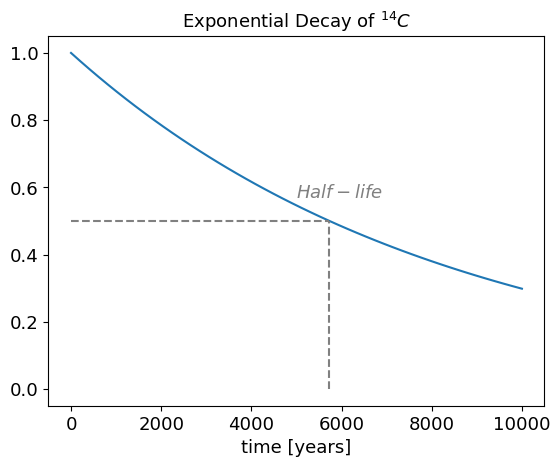

In [2]:
# exponential decay of C^14 atoms

fontsize = 13

lambda = log(2)/5730
x = range(0,10000,length = 50)
y = [exp(-k*lambda) for k = x]
plot(x,y)

xlabel("time [years]", fontsize=fontsize)
ax = gca()
FormatAxis(ax,fontsize)

plot((0,5730),(0.5,0.5),color = "gray",linestyle = "--")
plot((5730,5730),(0,0.5),color = "gray",linestyle = "--")
ax.text(0.5, 0.6, "\$Half-life\$" , transform=ax.transAxes, fontsize=fontsize, verticalalignment="top",color="gray")
ax.set_title("Exponential Decay of \$^{14}C\$",fontsize=fontsize);

Because the $^{14}C$ decays at a known rate which is exponentially decreasing over time (after 5730 years the rate will be halved), a measurement of the decay rate in a given sample can be used to determine how long the living being has been dead.

We are measuring the decays of $^{14}C$ per minute several times. Since there is only a certain probability that an atom decays within a certain time interval, the number of measured decays varies from measurement to measurement. The underlying statistics is called Poisson statistics.

The probability $p$ of measuring $x$ decays is given by
\begin{equation}
p_k(x) = \frac{k^x}{x!}e^{-k},
\end{equation}
with $k$ the expectation value which is our parameter of interest.

In [3]:
using Distributions 

# poisson distribution
p(x,k) = (k^(x)/factorial(x))*exp(-k)

p (generic function with 1 method)

## The Likelihood Function

We have a sample of archeological bones and we want to determine its age.
<img src="figures/bone.jpg" width="350">

We measure a bone piece containing one gram of natural carbon 10 times. The following array defines the observed number of decays per minute. It represents our dataset $D = \{x_1,x_2,\dots,x_n\}$:

In [4]:
data = [2, 3, 4, 6, 5, 3, 3, 5, 5, 6];

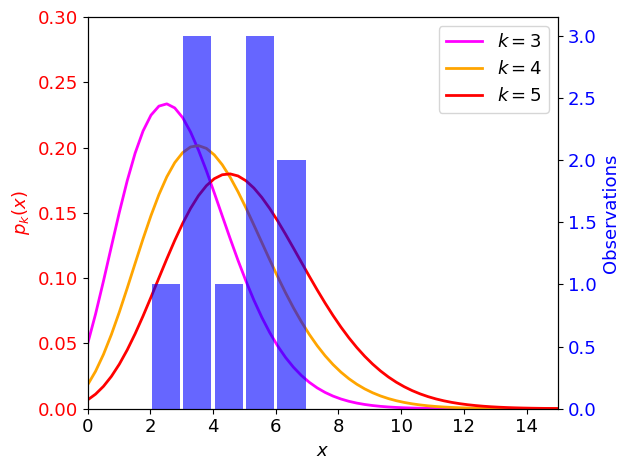

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [5]:
# Plot the data as a histogram and compare to different Poisson distributions. Which one matches best?

test_points = range(0,25,length = 100)

fig, ax1 = subplots()

# plot the poisson distributions
ax1.set_xlabel("\$x\$",fontsize=fontsize)
ax1.set_ylabel("\$p_k(x)\$", fontsize=fontsize,color = "red")

# ===============================================================================
# You can play around with the parameter k of the poisson distribution in order to find out which one is matching
# best to the data based on your eye judgement
ax1.plot(test_points,[p(x,3) for x in test_points],color = "magenta",label = "\$k = 3\$", linewidth = 2)
ax1.plot(test_points,[p(x,4) for x in test_points],color = "orange",label = "\$k = 4\$", linewidth = 2)
ax1.plot(test_points,[p(x,5) for x in test_points],color = "red",label = "\$k = 5\$", linewidth = 2)
# ===============================================================================

ax1.tick_params(axis="y", which="major", labelcolor="red")
FormatAxis(ax1,fontsize)
ax1.set_ylim(0,0.3)
ax1.set_xlim(0,15)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.set_ylabel("Observations", color="blue",fontsize=fontsize)  # we already handled the x-label with ax1
ax2.tick_params(axis="y", which="major", labelsize=fontsize, labelcolor="blue")

# plot the dataset as a histogram
ax2.hist(data,color="blue", alpha = 0.6, rwidth = 0.9, range = (0,15), bins = 15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = "upper right", fontsize=fontsize)
show()



The total probability of all observations together is given by:
\begin{equation}
\ell_k(D) = \prod_i p_k(x_i)
\end{equation}
This is also called the $Likelihood\;function$. We want to find the parameter $k$ for which the likelihood of our observation is at a maximum. Hence our optimization problem is:

Maximize $\ell_k (D)$ given our dataset $D$.

Or equivalently:

Minimize $-\log \ell_k (D)$

In [6]:
function Likelihood(k)
    L = 1
    for value in data
        L = L*p(value,k)
    end
    return L
end

println(Likelihood(2))

9.760374020681735e-13


In [7]:
# ===============================================================================
# Implement the negative log likelihood function
function LogLikelihood(k)
    L = 0
    for x in data
        L = L-log(p(x,k))
    end
    return L
end
# ===============================================================================

# ===============================================================================
# Implement the gradient of the negative log likelihood function
function ∇LogLikelihood(k)
    L = 0
    for x in data
        L = L-(x/k-1)
    end
    return L
end
# ===============================================================================


∇LogLikelihood (generic function with 1 method)

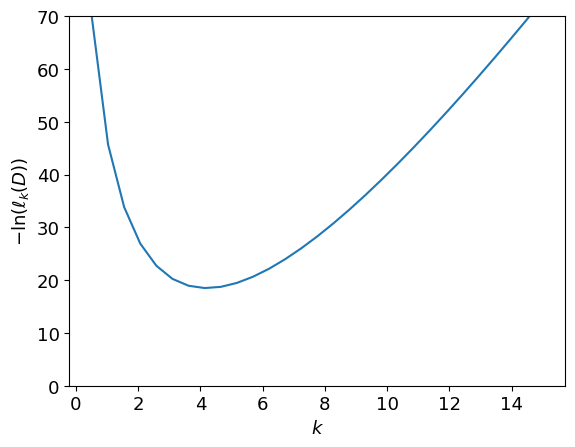

In [8]:
# plot the negative Log Likelihood function versus the parameter k

test_k = range(0,15,length = 30)

# ===============================================================================
# plot the negative log likelihood function versus the parameter k

L_plot = [LogLikelihood(k) for k in test_k]
plot(test_k,L_plot)

# ===============================================================================

xlabel(L"k", fontsize=fontsize)
ylabel(L"-\mathrm{ln}\left(\ell_k(D)\right)", fontsize=fontsize)

ylim(0,70)

ax = plt.gca()
FormatAxis(ax,fontsize)

In [9]:
# ===============================================================================
# perform gradient descent to find the optimal k
k0 = 10;
k_best,trace = gradient_descent(LogLikelihood,∇LogLikelihood,k0);

println("Optimal loss: ",trace[end,end])
println("Gradient at optimum: ",∇LogLikelihood(k_best))
println("Iterations: ", size(trace,2))
# ===============================================================================

Optimal loss: 18.493907008806843
Gradient at optimum: -1.7763568394002505e-15
Iterations: 2


The best estimator for the number of decays per minute $\hat{k}$ in one gram of carbon is:

In [10]:
println("Best estimator: ",round(k_best, digits=2))

Best estimator: 4.2


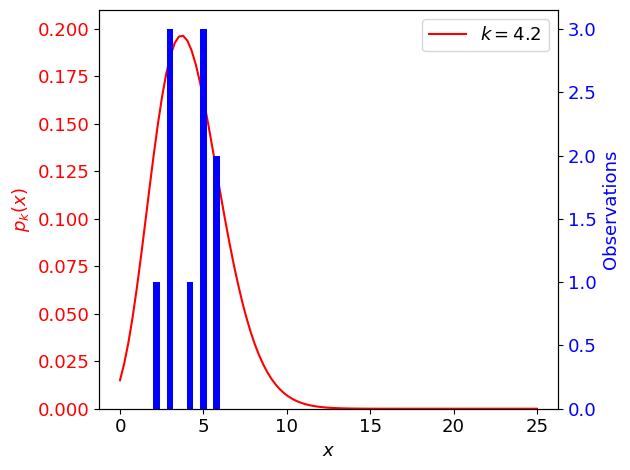

In [11]:
# show the best matching distribution together with the data

k_best = round(k_best, digits=2)

test_points = range(0,25,length = 100)
y = [p(x,k_best) for x in test_points]

fig, ax1 = subplots()

ax1.set_xlabel(L"$x$",fontsize=fontsize)
ax1.set_ylabel(L"$p_k(x)$", fontsize=fontsize,color = "red")
ax1.plot(test_points,y,color = "red",label = "\$k = $k_best\$")
ax1.tick_params(axis="y", which="major", labelcolor="red")
ax1.set_ylim(0,0.21)
FormatAxis(ax1,fontsize)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Observations", color="blue",fontsize=fontsize)  # we already handled the x-label with ax1
ax2.tick_params(axis="y", which="major", labelsize=fontsize, labelcolor="blue")
ax2.hist(data,color="blue")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = "upper right", fontsize=fontsize)
show()

The natural decay rate in a sample of one gram of pure carbon from a living animal should produce about $x_0 = 14$ radioactive decays per minute. This number is exponentially reduced after the death of the living being since no carbon is incorporated into the tissue any more.

The age of the sample in years is given by (derived from the kown half-life and the exponential decay function):
\begin{equation}
    a=8267\cdot \ln\frac{x_{0}}{\hat{k}}
\end{equation}

with $\hat{k}$ the value that minimizes $-\log \ell_k (D)$.

In [12]:
# ===============================================================================
# Calculate the age of the archeological artefact

x0 = 14
age = 8267 * log(x0/k_best)

# ===============================================================================


9953.243173362513

In [13]:
println(round(age, digits=2)," years")

9953.24 years


# Next Exercise

In [14]:
import DelimitedFiles
DF = DelimitedFiles;

We have given a mini shock absorber for scale cars which we want to characterize.

<img src="figures/Mini_Shocks.JPG" width="400">

Figure credit: By Avsar Aras - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=25687910

After applying a force on the absorber, we did a total of 30 measurements of its vertical position $p$ w.r.t. its equilibrium state versus time $t$. Negative values of $p$ mean that the shock absorber is compressed while positive values mean that it is expanded.

Due to the small scale of the shock absorbers and our limited measurement techniques, the data is influenced by statistical fluctuations within the measurement procedure.

We already split our 30 data points into 20 points for training and 10 points for testing.


In [15]:
# load training data
data = DF.readdlm("spring_pendulum_train_data.csv",',', Float64)
p_train = data[2,:]
t_train = data[1,:];

In [16]:
data = DF.readdlm("spring_pendulum_test_data.csv",',', Float64)
p_test = data[2,:]
t_test = data[1,:];

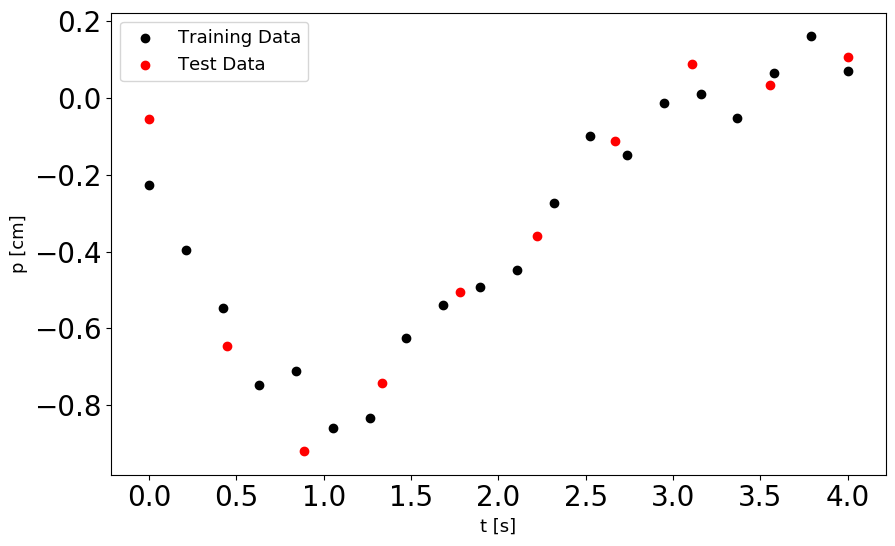

In [17]:
fig = figure(figsize= (10,6))
fontsize = 13
scatter(t_train,p_train, color = "black", label = "Training Data")
scatter(t_test,p_test, color = "red", label = "Test Data")
xlabel("t [s]",fontsize = fontsize)
ylabel("p [cm]", fontsize = fontsize)
legend(fontsize = fontsize)
ax = plt.gca()
FormatAxis(ax,20)

We would like to model the data in order to be able to compare the curves to other shock absorber models.

In [18]:
# Model from polynomial Basis Functions


#################### Define Models #############################

# generic implementation of a polynomial of arbitrary degree d
function model_poly(x,θ)
    # get the number of parameters. The polynomial degree d is given by d = n - 1
    n = size(θ,1) 
    
    poly = θ[1] # beware that array indeces start with 1 in Julia!
    for i in range(1,stop = n-1)
        # compose the polynomial
        poly = θ[i+1].*x.^i .+ poly
    end
    return poly
end


function ∇model_poly(x,θ)
#    function calculate_gradient(θ)
        n = size(θ,1)
        n_data = size(x,1)
        gradient = zeros(n_data,n)
        gradient[:,1] = ones(n_data)
        for i in range(2,stop = n)
            gradient[:,i] = x.^(i-1)
        end
#        return gradient
#    end
    return gradient
end

#function H_model_poly(x,θ)
#        n = size(θ,1)
#        hessian = zeros(n,n)
#        for i in range(0,stop = n-1)
#            for j in range(0,stop = n-1)
#            # ===============================================================================
            # Calculate the entries of the hessian matrix
            # Beware that array indeces start with 1 in Julia!
            
#            if(j == i)
#                hessian[i+1,j+1] = 0
#            else
#                hessian[i+1,j+1] = sum(x.^i .* x.^j)
#            end
            # ===============================================================================
#            end
#        end
#        return hessian
#end


# Model from Gaussian Basis Functions

function gaussian(x, mu, sigma)
    return exp.(-(x .-mu).^2 ./(2*sigma^2))
end


function model_gaussian(x,θ)
    n = size(θ,1)
    poly = θ[1]
    for i in range(1,stop = n-1)
        poly = θ[i+1].* gaussian(x, mus[i], sigma) .+ poly
    end
    return poly
end


function ∇model_gaussian(x,θ)
    n = size(θ,1)
    n_data = size(x,1)
    gradient = zeros(n_data,n)
    gradient[:,1] = ones(n_data)
    for i in range(2,stop = n)
        gradient[:,i] = gaussian(x, mus[i-1], sigma)
    end
    return gradient
end

#function H_model_gaussian(x,θ)
#    n = size(θ,1)
#    hessian = zeros(n,n)
#    for i in range(1,stop = n)
#        for j in range(1,stop = n)
#            # ===============================================================================
            # Calculate the entries of the hessian matrix
            # Beware that array indeces start with 1 in Julia!
            
#            if(j == i)
#                hessian[i,j] = 0
#            else
#                if i == 1
#                    basis_i = 1
#                else
#                    basis_i = gaussian(x, mus[i], sigma)
#                end
#                
#                if j == 1
#                    basis_j = 1
#                else
#                    basis_j = gaussian(x, mus[j], sigma)
#                end
#                hessian[i,j] = sum(basis_i.*basis_j)
#            end
#            # ===============================================================================
#        end
#    end
#    return hessian
#end

################### Define Loss functions #########################

function Huber_loss(x,y,model,ω)
    function calculate_loss(θ)
        delta = abs.(y - model(x,θ))
        result = zeros(size(delta,1))
        for (i, d_i) in enumerate(delta)
            if d_i < ω
                result[i] = 0.5*d_i^2
            else
                result[i] = ω*(abs(d_i)-0.5*ω)
            end
        end
        return sum(result)
    end
end

function quadratic_loss(x,y,model)
    function calculate_loss(θ)
        return sum((y.-model(x,θ)).^2)
    end
end

################# Define Gradients of Loss functions ######################

# gradient of the quadratic loss function --> for a generic model and dataset
function ∇quadratic_loss(x,y,model,∇model)
    function calculate_gradient(θ)
        # get the number of parameter of the polynomial model
        n = size(θ,1)
        ∇loss = zeros(n)
        # ===============================================================================
        for i in range(1,stop = n)
            # ===============================================================================
            # Calculate the entries of the gradient vector
            # Beware that array indeces start with 1 in Julia!
            
            ∇loss[i] = -2*sum((y.-model(x,θ)).*∇model(x,θ)[:,i])
            # ===============================================================================
  
        end
        return ∇loss
    end
end

function ∇Huber_loss(x,y,model,∇model,ω)
    function calculate_gradient(θ)
        n_data = size(x,1)
        delta = abs.(y - model(x,θ))
        gradient = zeros(size(θ,1))
        for (j, θ_i) in enumerate(θ)
            result = zeros(n_data)
            for (i, d_i) in enumerate(delta)
                if d_i < ω
                    result[i] = - d_i*∇model(x[i],θ)[j]
                else
                    result[i] = ω*∇model(x[i],θ)[j]
                end
            end
            gradient[j] = sum(result)
        end
        return gradient
    end
end

################# Define Hessians of Loss functions ######################


# Hessian of the loss function
function H_quadratic_loss(x,y,model,∇model)
    # get the number of parameter of the polynomial model
    function calculate_hessian(θ)
        n = size(θ,1)
        hessian = zeros(n,n)
        for i in range(1,stop = n)
            for j in range(1,stop = n)
            # ===============================================================================
            # Calculate the entries of the hessian matrix
            # Beware that array indeces start with 1 in Julia!

                hessian[i,j] = 2* sum(∇model(x,θ)[:,i] .* ∇model(x,θ)[:,j]) # .+ (y .- model(x,θ)).*H_model(x,θ)[i,j])
                
            # ===============================================================================
            end
        end
        return hessian
    end
end


function H_loss_poly(x)
    n = size(x,1)
    H_loss = zeros(n,n)
    for i in 0:n-1
        for j in 0:n-1
            H_loss[i+1,j+1] = 2*sum((times'/60).^i .* (times'/60).^j)
        end
    end
    return H_loss
end


#function ∇loss_quadratic(model,∇model,params,p,t)
#    return -2*sum((p - model(t,params))*∇model(t,params))
#end

# ===============================================================================
# implement the quadratic loss between the datapoints and model_poly(t,params)
#loss_poly(x) = sum((d'.-model_poly(t,x)).^2)

#function loss_poly(x,y)
#    function calculate_loss(θ)
#        return sum((y.-model_poly(x,θ)).^2)
#    end
#end
    
# ===============================================================================

H_loss_poly (generic function with 1 method)

In [19]:
n_params = 12
mus = range(minimum(t_train), maximum(t_train), length = n_params-1) # one basis function less than number of parameters
sigma = 2

2

In [20]:
# quadratic losses for training data

loss_train_poly_quadratic = quadratic_loss(t_train,p_train,model_poly)
∇loss_train_poly_quadratic = ∇quadratic_loss(t_train,p_train,model_poly,∇model_poly)
H_loss_train_poly_quadratic = H_quadratic_loss(t_train,p_train,model_poly,∇model_poly)

loss_train_gaussian_quadratic = quadratic_loss(t_train,p_train,model_gaussian)
∇loss_train_gaussian_quadratic = ∇quadratic_loss(t_train,p_train,model_gaussian,∇model_gaussian)
H_loss_train_gaussian_quadratic = H_quadratic_loss(t_train,p_train,model_gaussian,∇model_gaussian)

loss_test_poly_quadratic = quadratic_loss(t_test,p_test,model_poly)
loss_test_gaussian_quadratic = quadratic_loss(t_test,p_test,model_gaussian)


(::var"#calculate_loss#15"{Array{Float64,1},Array{Float64,1},typeof(model_gaussian)}) (generic function with 1 method)

In [21]:
#h = 0.00001
#@assert sum(abs.(df_approx(loss,x0,h) .- ∇loss(x0)).<0.1) == size(x0,1)

In [22]:
x0 = 10*rand(n_params) # initial parameter setting
result_poly,trace_poly = newton_descent(loss_train_poly_quadratic,∇loss_train_poly_quadratic, H_loss_train_poly_quadratic,x0,maxiters = 10000, eps = 0.0001);

println("Minimizer: ",result_poly)
println("Number of Iterations: ",size(trace_poly,2))
println("Optimal loss: ",loss_train_poly_quadratic(result_poly))
println("Loss on test data: ",loss_test_poly_quadratic(result_poly))
println("Gradient at Optimum: ",∇loss_train_poly_quadratic(result_poly))

Minimizer: [-0.22629455584121827, 0.16746983083238287, -10.297104690223316, 41.0616973163909, -84.3619628614, 102.22951868010665, -76.90873489029664, 36.864148094301996, -11.263020329498204, 2.1223316408414465, -0.22469874727453404, 0.010222566495669477]
Number of Iterations: 3
Optimal loss: 0.03473820886704975
Loss on test data: 0.06111353299898832
Gradient at Optimum: [3.1056053562128483e-9, 4.2131770034564697e-10, -2.5092067815896124e-9, -4.551507908068242e-8, -8.291984779362771e-8, -4.4735092508130236e-7, -1.4066919473698647e-6, -3.390295534089205e-6, -1.8023760340213357e-5, -9.934646058695762e-5, -0.0002113709001037023, -0.0009989235734337854]


In [23]:
result_gaussian,trace_gaussian = newton_descent(loss_train_gaussian_quadratic,∇loss_train_gaussian_quadratic, H_loss_train_gaussian_quadratic, x0,maxiters = 10000, eps = 0.0001);

println("Minimizer: ",result_gaussian)
println("Number of Iterations: ",size(trace_gaussian,2))
println("Optimal loss: ",loss_train_gaussian_quadratic(result_gaussian))
println("Loss on test data: ",loss_test_gaussian_quadratic(result_gaussian))
println("Gradient at Optimum: ",∇loss_train_gaussian_quadratic(result_gaussian))

Minimizer: [-1443.90045403351, 34878.07416977527, 41437.39687469169, -529339.2501756081, 1.2074319505784982e6, -1.535743069769838e6, 1.6658924718299252e6, -1.8552884273775811e6, 1.6157070197665666e6, -803869.4177153124, 144556.55486561474, 17683.146955118387]
Number of Iterations: 3
Optimal loss: 0.04561067143927808
Loss on test data: 0.06978421203236974
Gradient at Optimum: [-1.7758039344561993e-9, 2.7584945265501926e-10, 2.338395993332909e-9, -2.845123062492072e-9, -4.688596195318029e-9, -3.6719197040596674e-9, -2.5896783814594038e-9, -1.8746754287812806e-9, -6.902117488660764e-10, 2.399693985188911e-11, -1.7355112590100585e-9, -2.200819054776204e-9]


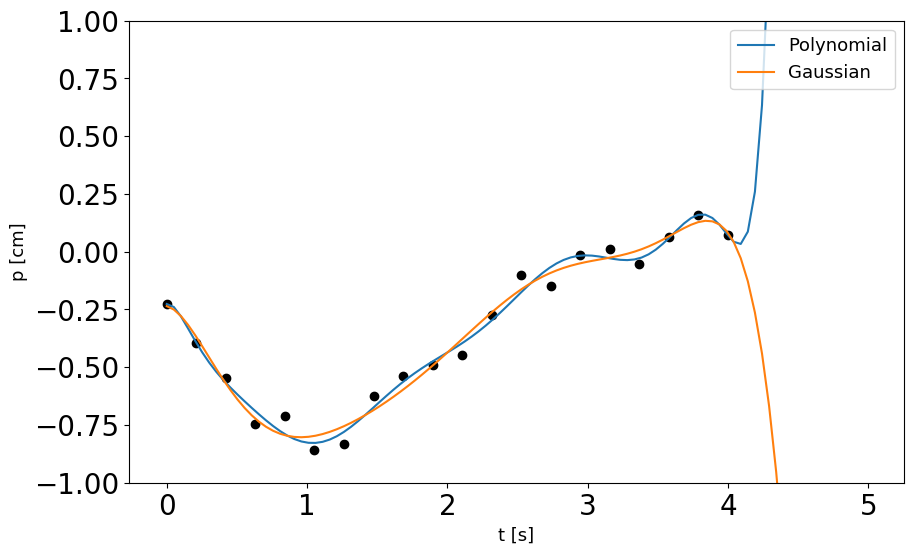

In [24]:
t_plot = range(0,5,length = 100)

fig = figure(figsize= (10,6))
plot(t_plot,model_poly(t_plot,result_poly)', label = "Polynomial")
plot(t_plot,model_gaussian(t_plot,result_gaussian)', label = "Gaussian")
scatter(t_train,p_train, color = "black")
xlabel("t [s]",fontsize = fontsize)
ylabel("p [cm]", fontsize = fontsize)
legend(loc = "upper right", fontsize = fontsize)

ylim(-1,1)

ax = plt.gca()
FormatAxis(ax,20)

In [25]:
n_paras_max = 9
losses_poly_test = zeros(n_paras_max)
losses_poly_train = zeros(n_paras_max)
losses_gaussian_test = zeros(n_paras_max)
losses_gaussian_train = zeros(n_paras_max)

results_poly = zeros(n_paras_max,n_paras_max)
results_gaussian = zeros(n_paras_max,n_paras_max)

for n_params in range(1,stop=n_paras_max)
    # create an array of random numbers to get a starting point
    x0 = 10*rand(n_params)
    
    result_poly,trace_poly = newton_descent(loss_train_poly_quadratic,∇loss_train_poly_quadratic, H_loss_train_poly_quadratic,x0,maxiters = 10000, eps = 0.0001);
    result_gaussian,trace_gaussian = newton_descent(loss_train_gaussian_quadratic,∇loss_train_gaussian_quadratic, H_loss_train_gaussian_quadratic, x0,maxiters = 10000, eps = 0.0001);
    
    losses_poly_test[n_params] = loss_test_poly_quadratic(result_poly)
    losses_poly_train[n_params] = loss_train_poly_quadratic(result_poly)
    results_poly[n_params,1:n_params] = result_poly
    
    losses_gaussian_test[n_params] = loss_test_gaussian_quadratic(result_gaussian)
    losses_gaussian_train[n_params] = loss_train_gaussian_quadratic(result_gaussian)
    results_gaussian[n_params,1:n_params] = result_gaussian
    
end

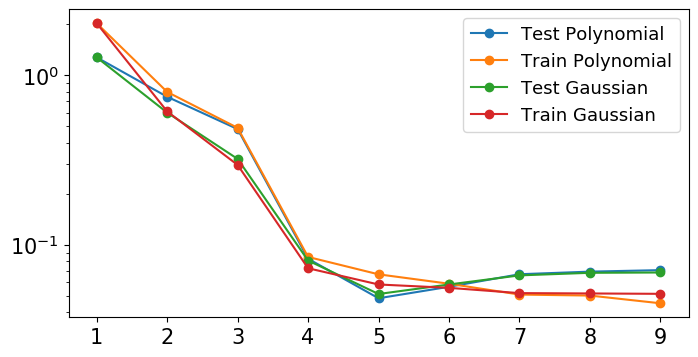

In [26]:
fig = figure(figsize= (8,4))
plot(range(1,stop=n_paras_max),losses_poly_test, label = "Test Polynomial", marker = "o")
plot(range(1,stop=n_paras_max),losses_poly_train, label = "Train Polynomial", marker = "o")

plot(range(1,stop=n_paras_max),losses_gaussian_test, label = "Test Gaussian", marker = "o")
plot(range(1,stop=n_paras_max),losses_gaussian_train, label = "Train Gaussian", marker = "o")

ax = plt.gca()
FormatAxis(ax,15)
legend(fontsize = fontsize)
ax.set_yscale("log")

#ylim(0,0.2)

According to the above plot: Which number of parameters seems to be best?

# Implement Regularization

In [27]:
function regularization(θ,μ,m)
        return μ * sum(θ.^m)
end

function ∇regularization(θ,μ,m)
        n = size(θ,1)
        gradient = μ .* m.*θ.^(m-1)
        return gradient
end

function H_regularization(θ,μ,m)
        n = size(θ,1)
        hessian = zeros(n,n)
        for i in 1:n
            hessian[i,i] = μ * m^2 *θ[i]^(m-2)
        end
        return hessian
end

H_regularization (generic function with 1 method)

In [28]:
m = 2
n_params = 12
μ = 1e-6

loss_train_poly_quadratic_reg(x) = loss_train_poly_quadratic(x) + regularization(x,μ,m)
∇loss_train_poly_quadratic_reg(x) = ∇loss_train_poly_quadratic(x) + ∇regularization(x,μ,m)
H_loss_train_poly_quadratic_reg(x) = H_loss_train_poly_quadratic(x) + H_regularization(x,μ,m)


loss_train_gaussian_quadratic_reg(x) = loss_train_gaussian_quadratic(x) + regularization(x,μ,m)
∇loss_train_gaussian_quadratic_reg(x) = ∇loss_train_gaussian_quadratic(x) + ∇regularization(x,μ,m)
H_loss_train_gaussian_quadratic_reg(x) = H_loss_train_gaussian_quadratic(x) + H_regularization(x,μ,m)


H_loss_train_gaussian_quadratic_reg (generic function with 1 method)

In [29]:
x0 = 10*rand(n_params) # initial parameter setting
result_poly,trace_poly = newton_descent(loss_train_poly_quadratic_reg,∇loss_train_poly_quadratic_reg,H_loss_train_poly_quadratic_reg,x0,maxiters = 10000, eps = 0.00001);

println("Minimizer: ",result_poly)
println("Number of Iterations: ",size(trace_poly,2))
println("Optimal loss: ",loss_train_poly_quadratic(result_poly))
println("Loss on test data: ",loss_test_poly_quadratic(result_poly))
println("Gradient at Optimum: ",∇loss_train_poly_quadratic(result_poly))

Minimizer: [-0.22453258695294703, -1.1607002216047173, 2.2921543280200067, -4.275733691845, 0.5675211674766634, 8.027717534524827, -10.993081308088216, 6.973379637631542, -2.495142571973207, 0.5167922647684846, -0.057864796534637296, 0.0027120970838233048]
Number of Iterations: 3
Optimal loss: 0.036140203901793115
Loss on test data: 0.06047383140192658
Gradient at Optimum: [4.492035028530461e-7, 2.19832915538537e-6, -3.771349657705203e-6, 6.850853820683511e-6, -8.11848979154206e-8, -1.5082041310066074e-5, 1.9945873763305144e-5, -1.2635550987738497e-5, 4.189743322058348e-6, -2.720712473092135e-6, -1.3290375136421062e-5, -4.667581742978655e-5]


In [30]:
result_gaussian,trace_gaussian = newton_descent(loss_train_gaussian_quadratic_reg,∇loss_train_gaussian_quadratic_reg, H_loss_train_gaussian_quadratic_reg, x0,maxiters = 10000, eps = 0.00001);

println("Minimizer: ",result_gaussian)
println("Number of Iterations: ",size(trace_gaussian,2))
println("Optimal loss: ",loss_train_gaussian_quadratic(result_gaussian))
println("Loss on test data: ",loss_test_gaussian_quadratic(result_gaussian))
println("Gradient at Optimum: ",∇loss_train_gaussian_quadratic(result_gaussian))

Minimizer: [4.663162697775087, 4.867480005123474, -2.2277444079777804, -6.982440484105388, -5.380253940971992, -1.8115031384770075, 3.5537761594791686, 6.493355468663228, 2.802673604690546, -0.7043534982076474, -4.750336530448269, -3.836695498398056]
Number of Iterations: 3
Optimal loss: 0.05734719873411532
Loss on test data: 0.053417790419343955
Gradient at Optimum: [-8.751260977185593e-6, -1.2043133587626847e-5, 5.183479851934847e-6, 1.525461106620038e-5, 1.3314509075931097e-5, 2.305929629499437e-6, -9.457061391021648e-6, -1.3647898667756841e-5, -7.277032067508349e-6, 4.922794385298079e-6, 1.2382721082629389e-5, 3.823076608178155e-6]


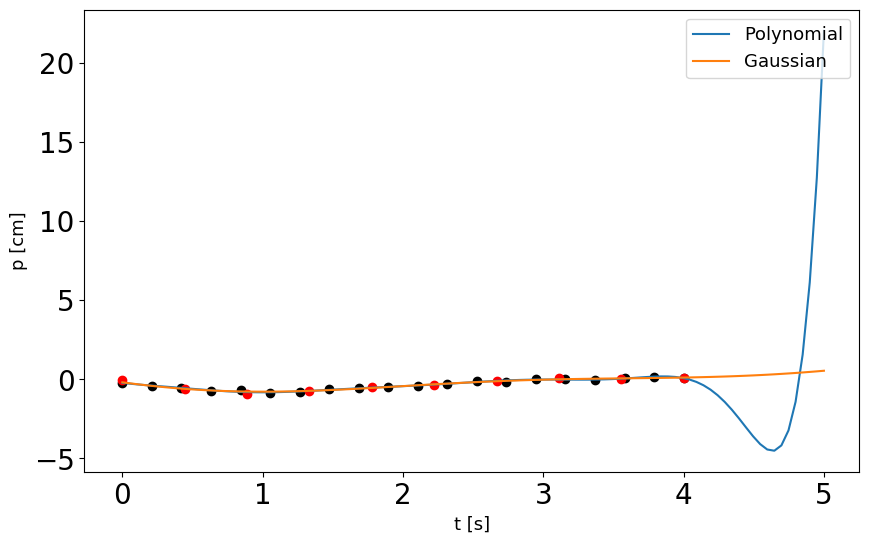

In [31]:
t_plot = range(0,5,length = 100)

fig = figure(figsize= (10,6))
plot(t_plot,model_poly(t_plot,result_poly)', label = "Polynomial")
plot(t_plot,model_gaussian(t_plot,result_gaussian)', label = "Gaussian")
scatter(t_train,p_train, color = "black")
scatter(t_test,p_test, color = "red")
xlabel("t [s]",fontsize = fontsize)
ylabel("p [cm]", fontsize = fontsize)
legend(loc = "upper right", fontsize = fontsize)

#ylim(-1,1)

ax = plt.gca()
FormatAxis(ax,20)

In [32]:
μ_array = [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,0.0001,0.001,0.01,0.1,1,10,100]
n_μ = size(μ_array,1)

losses_poly_test = zeros(n_μ)
losses_poly_train = zeros(n_μ)
losses_gaussian_test = zeros(n_μ)
losses_gaussian_train = zeros(n_μ)

results_poly = zeros(n_μ,n_params)
results_gaussian = zeros(n_μ,n_params)


for (index,μ) in enumerate(μ_array)
    # create an array of random numbers to get a starting point
    x0 = 10*rand(n_params)
    
    loss_train_poly_quadratic_reg(x) = loss_train_poly_quadratic(x) + regularization(x,μ,m)
    ∇loss_train_poly_quadratic_reg(x) = ∇loss_train_poly_quadratic(x) + ∇regularization(x,μ,m)
    H_loss_train_poly_quadratic_reg(x) = H_loss_train_poly_quadratic(x) + H_regularization(x,μ,m)

    loss_train_gaussian_quadratic_reg(x) = loss_train_gaussian_quadratic(x) + regularization(x,μ,m)
    ∇loss_train_gaussian_quadratic_reg(x) = ∇loss_train_gaussian_quadratic(x) + ∇regularization(x,μ,m)
    H_loss_train_gaussian_quadratic_reg(x) = H_loss_train_gaussian_quadratic(x) + H_regularization(x,μ,m)
    
    
    result_poly,trace_poly = newton_descent(loss_train_poly_quadratic_reg,
                                            ∇loss_train_poly_quadratic_reg,
                                            H_loss_train_poly_quadratic_reg,
                                            x0,
                                            maxiters = 10000,
                                            eps = 0.0001);
    result_gaussian,trace_gaussian = newton_descent(loss_train_gaussian_quadratic_reg,
                                                    ∇loss_train_gaussian_quadratic_reg,
                                                    H_loss_train_gaussian_quadratic_reg,
                                                    x0,
                                                    maxiters = 10000,
                                                    eps = 0.0001);
    
    losses_poly_test[index] = loss_test_poly_quadratic(result_poly)
    losses_poly_train[index] = loss_train_poly_quadratic(result_poly)
    results_poly[index,1:n_params] = result_poly
    
    losses_gaussian_test[index] = loss_test_gaussian_quadratic(result_gaussian)
    losses_gaussian_train[index] = loss_train_gaussian_quadratic(result_gaussian)
    results_gaussian[index,1:n_params] = result_gaussian
    
end

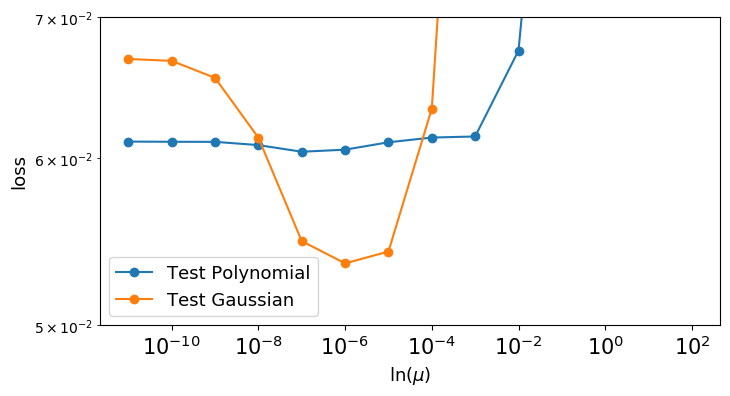

(0.05, 0.07)

In [33]:
fig = figure(figsize= (8,4))
plot(μ_array,losses_poly_test, label = "Test Polynomial", marker = "o")
#plot(μ_array,losses_poly_train, label = "Train Polynomial", marker = "o")

plot(μ_array,losses_gaussian_test, label = "Test Gaussian", marker = "o")
#plot(μ_array,losses_gaussian_train, label = "Train Gaussian", marker = "o")

ax = plt.gca()
FormatAxis(ax,15)
legend(fontsize = fontsize)
ax.set_yscale("log")
ax.set_xscale("log")

xlabel(L"ln($\mu$)", fontsize = fontsize)
ylabel("loss", fontsize = fontsize)

ylim(5e-2,7e-2)

# Rest

In [34]:
println("Optimal loss: ",loss(result_reg))
println("Loss on test data: ",loss_test(result_reg))
println("Gradient at Optimum: ",∇loss_reg(result_reg))

LoadError: UndefVarError: loss not defined

In [35]:
x_exact = [model(t,para_true) for t in times_model]

fig = figure(figsize= (10,6))
plot(times_model,model(times_model,result_reg[1:4]), label = "Best Fit")
plot(times_model,model(times_model,para_true), label = "Truth")
scatter(times,deflection, color = "black")
xlabel("t",fontsize = fontsize)
ylabel("x", fontsize = fontsize)
legend(loc = "upper right", fontsize = fontsize)
ax = plt.gca()
FormatAxis(ax,20)

LoadError: UndefVarError: times_model not defined

In [36]:
degree = 12

# create an array of random numbers to get a starting point
x0 = 10*rand(degree + 1)

result_nwt, trace_nwt = newton_descent(loss_poly, ∇loss_poly, H_loss_poly, x0; ls=true, eps=0.0001, maxiters=1000)
println("Optimal velocity [km/h]: ",result_nwt)
println("Optimal loss: ",trace_nwt[end,end])
println("Gradient at optimum: ",∇loss_poly(result_nwt))
println("Iterations: ", size(trace_nwt,2))

LoadError: UndefVarError: loss_poly not defined

In [37]:
println("Optimal loss: ",loss_poly(result_nwt))
println("Loss on test data: ",loss_poly_test(result_nwt))

LoadError: UndefVarError: loss_poly not defined

In [38]:
println("Gradient at optimum: ",∇loss_poly(results[11,:]))

LoadError: UndefVarError: results not defined

# Sine



<img src="figures/Federpendel2.png" width="200">

The movement of a spring pendulum with a mass $m$ and a spring constant $k$ (stating how much force has to be applied to the spring to distort it a given distance from its equilibrium) can be described by the the following equation:

\begin{equation}
x(t)=x_0\,e^{-\delta t}\cos(\omega_d\, t+ \varphi_0)
\end{equation}

Abklingkonstante: $\delta=\frac{d}{2m}$

Ungedämpfte Eigenkreisfrequenz: $\omega_0=\sqrt{\frac{k}{m}}$

Gedämpfte Kreisfequenz: $\omega_d = \sqrt {\omega_0^2-\delta^2}$

In [39]:
# implemented solution of differential equation x(t)
# para[0]: Amplitude
# para[1]: Abklingkonstante
# para[2]: Gedämpfte Kreisfrequenz
# para[3]: Phasenverschiebung phi_0
function model_sine(x,θ)
    #return θ[1] .* exp.(-para[2].* x) .* cos.(para[3] .* x .+ para[4])
    #return θ[1] .* exp.(-θ[2].* x) .* sin.(θ[3] .* x .+ θ[4])
    #return θ[1] .* exp.(-θ[2].* x) .* sin.(θ[3] .* x .+ θ[4])
    return θ[1] .* cos.(θ[2] .* x )
end

#function ∇model_sine(x,θ)
#    gradient = zeros(size(x,1),size(θ,1))
#    gradient[:,1] = exp.(-θ[2].* x) .* sin.(θ[2] .* x .+ θ[3])
#    gradient[:,2] = - θ[1] .* x .* exp.(-θ[2].* x) .* sin.(θ[2] .* x .+ θ[3])
#    gradient[:,3] = θ[1] .* x .* exp.(-θ[2].* x) .* cos.(θ[2] .* x .+ θ[3])
#    gradient[:,4] = θ[1] .* exp.(-θ[2].* x) .* cos.(θ[2] .* x .+ θ[3])
#    return gradient
#end

function ∇model_sine(x,θ)
    gradient = zeros(size(x,1),size(θ,1))
    gradient[:,1] = cos.(θ[2] .* x )
    gradient[:,2] = -θ[1] .* x .*  sin.(θ[2] .* x)
    return gradient
end

data = DF.readdlm("spring_pendulum_train_data_equi.csv",',', Float64)
p_train = data[2,:]
t_train = data[1,:];


In [40]:
# quadratic losses for training data

loss_train_sine_quadratic = quadratic_loss(t_train,p_train,model_sine)
∇loss_train_sine_quadratic = ∇quadratic_loss(t_train,p_train,model_sine,∇model_sine)
#loss_test_sine_quadratic = quadratic_loss(t_test,p_test,model_sine)


(::var"#calculate_gradient#16"{Array{Float64,1},Array{Float64,1},typeof(model_sine),typeof(∇model_sine)}) (generic function with 1 method)

In [55]:
using ForwardDiff
H_loss_function(x) = ForwardDiff.hessian(loss_train_sine_quadratic, x)

H_loss_function (generic function with 1 method)

In [56]:
x0 = 10*rand(2) # initial parameter setting
result_nwt, trace_nwt = newton_descent(loss_train_sine_quadratic, ∇loss_train_sine_quadratic, H_loss_function, x0; ls=true, eps=0.0001, maxiters=1000)
println("Optimal velocity [km/h]: ",result_nwt)
println("Optimal loss: ",trace_nwt[end,end])
println("Gradient at optimum: ",∇loss_train_sine_quadratic(result_nwt))
println("Iterations: ", size(trace_nwt,2))

Optimal velocity [km/h]: [0.17854977656128335, 3.5764719092724406]
Optimal loss: 62.70797412831217
Gradient at optimum: [3.037667765082297e-5, 0.0008331415910038942]
Iterations: 5


In [57]:
result,trace = gradient_descent(loss_train_sine_quadratic, ∇loss_train_sine_quadratic, x0,maxiters = 10000)
println("Result: ", result)
println("Iterations: ", size(trace[1,:],1)-1)
println("Loss: ", loss_train_sine_quadratic(result))
println("Gradient: ", ∇loss_train_sine_quadratic(result))

Result: [0.03826030210006849, 100.21676923240146]
Iterations: 150
Loss: 63.146126500245344
Gradient: [-6.718678096495623e-5, -6.459654289837035e-5]


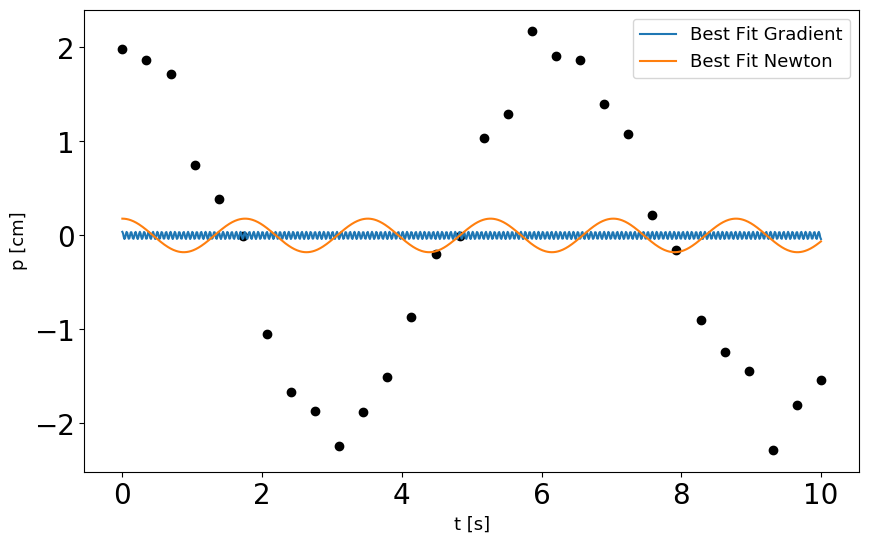

In [58]:
t_plot = range(0,maximum(t_train),length = 1000)

pygui(false);
fig = figure(figsize= (10,6))
plot(t_plot,model_sine(t_plot,result)', label = "Best Fit Gradient")
plot(t_plot,model_sine(t_plot,result_nwt)', label = "Best Fit Newton")
#plot(t_plot,model_sine(t_plot,[2,30])', label = "Custom Tuned")
scatter(t_train,p_train, color = "black")
xlabel("t [s]",fontsize = fontsize)
ylabel("p [cm]", fontsize = fontsize)
legend(loc = "upper right", fontsize = fontsize)

#ylim(-1,1)

ax = plt.gca()
FormatAxis(ax,20)

In [59]:
# plot the loss function for the case that the model is of degree 2, i.e. has 2 parameters

n_points = 50
θ1_plot = range(-10,10,length = n_points)
θ2_plot = range(-50,50,length = n_points)

losses_plot = [loss_train_sine_quadratic([θ1,θ2]) for θ1 = θ1_plot, θ2 = θ2_plot]

# create grid points
xgrid = repeat(θ1_plot',n_points,1)
ygrid = repeat(θ2_plot,1,n_points)

# allow window to open for interactions
using3D()
pygui(true);
fig = figure("pyplot_surfaceplot",figsize=(15,10))
ax = fig.add_subplot(1,1,1,projection="3d")

    # plot loss function
plot_surface(xgrid', ygrid', losses_plot, rstride=2,edgecolors="k", cstride=2, cmap=ColorMap("gray"), alpha=0.3, linewidth=0.25)
    
    # plot traces of gradient and newton descent
ax[:plot](trace[1,:], trace[2,:], trace[3,:], color="red", zorder = 3)
ax[:scatter](trace[1,:], trace[2,:], trace[3,:], color="red")

ax[:plot](trace_nwt[1,:], trace_nwt[2,:], trace_nwt[3,:], color="orange", zorder = 3)
ax[:scatter](trace_nwt[1,:], trace_nwt[2,:], trace_nwt[3,:], color="orange")

xlabel(L"\theta_1", fontsize=fontsize)
ylabel(L"\theta_2", fontsize=fontsize)
zlabel(L"loss", fontsize=fontsize)

FormatAxis(ax,fontsize)

# Soft Constraints

In [47]:
function df_approx(f,x,h)
    # ===============================================
    # Return the difference quotient
    n = size(x,1)
    ∇loss = zeros(n)
    for i in range(0,stop = n-1)
        h_vec = zeros(n)
        h_vec[i+1] = 1
        x_h = x .+ h*h_vec
        ∇loss[i+1] = (f(x_h) .- f(x))./h
    end
    # ===============================================
    return ∇loss
end

df_approx (generic function with 1 method)

# use gradient descent for Huber loss

In [48]:
# Huber losses
ω = 1

loss_train_poly_Huber = Huber_loss(t_train,p_train,model_poly,ω)
∇loss_train_poly_Huber = ∇Huber_loss(t_train,p_train,model_poly,∇model_poly,ω)

loss_train_gaussian_Huber = Huber_loss(t_train,p_train,model_gaussian,ω)
∇loss_train_gaussian_Huber = ∇Huber_loss(t_train,p_train,model_gaussian,∇model_gaussian,ω)

(::var"#calculate_gradient#17"{Array{Float64,1},Array{Float64,1},typeof(model_gaussian),typeof(∇model_gaussian),Int64}) (generic function with 1 method)